# 1. Seminář
## Bisekce, Jacobi, Lagrange

In [3]:
import math as mt
import numpy as np
import random


In [3]:
"""Metoda bisekce je jednoduchý numerický algoritmus používaný k nalezení kořenů (řešení) reálných funkcí na určitém intervalu. 
Tato metoda je založena na základním principu, že pokud máme funkci, která na jednom konci intervalu má kladnou hodnotu
a na druhém konci má zápornou hodnotu (nebo naopak), pak tato funkce musí mít alespoň jeden kořen na tomto intervalu.

Zvolení intervalu: Začneme s určením počátečního intervalu, ve kterém předpokládáme, že funkce má kořen. Interval určíme tak, aby na jednom konci byla kladná hodnota funkce a na druhém konci záporná hodnota.

Dělení intervalu na poloviny: Rozdělíme tento interval na dvě poloviny a vypočítáme hodnotu funkce uprostřed intervalu (to je bod nazývaný "bisekční bod").

Test znaménka funkce: Zjistíme, zda má funkce na bisekčním bodě kladnou nebo zápornou hodnotu.

Zkrácení intervalu: Pokud má funkce na bisekčním bodě kladnou hodnotu, potom víme, že kořen je někde v levé polovině intervalu, a naopak, pokud má zápornou hodnotu, víme, že kořen je v pravé polovině intervalu. 
Takto zkrátíme interval na polovinu původní délky.

Opakování kroků: Tento proces opakujeme, dokud nedosáhneme požadované přesnosti nebo po určitém počtu iterací.

Metoda bisekce je pomalá, ale spolehlivá a jednoduchá na implementaci. Je vhodná pro funkce, které jsou spojité na zadaném intervalu a mají opačná znaménka na koncích intervalu.
Tato metoda najde kořen funkce v zadaném intervalu, a to i v případech, kdy je řešení obtížné najít analyticky.

"""


def bisection(func, a, b, tol=1e-6, max_iter=100):
    if func(a) * func(b) >= 0:
        raise ValueError("Funkce na zadaném intervalu nemá opačné znaménky na koncích intervalu.")

    for i in range(max_iter):
        c = (a + b) / 2.0

        if func(c) == 0 or (b - a) / 2.0 < tol:
            return c  # Máme řešení nebo dosáhli požadované přesnosti

        if func(c) * func(a) < 0:
            b = c
        else:
            a = c

    raise Exception("Metoda bisekce nedosáhla požadovaného řešení po maximálním počtu iterací.")

# Příklad použití:
def f(x):
    return x**2 - 4  # Hledáme kořeny funkce x^2 - 4

a = 0.0
b = 3.0

solution = bisection(f, a, b)
print("Kořen je přibližně:", solution)

Kořen je přibližně: 2.000000238418579


In [6]:
"""Jacobiho metoda je jedna z numerických metod používaných k řešení soustav lineárních rovnic.
Tato metoda patří mezi iterativní přístupy, což znamená, že se snaží najít řešení tím, že postupně zlepšuje své aproximace až do dosažení požadované přesnosti.
Soustava lineárních rovnic: Máme soustavu n lineárních rovnic s n neznámými:

A * x = b
Kde A je matice koeficientů, x je vektor neznámých a b je vektor pravých stran.

Přepis soustavy: Jacobiho metoda se snaží přepsat soustavu tak, aby řešení jednotlivých neznámých mohlo být vypočítáno iterativně. Přepis soustavy může vypadat následovně:

    x_i^(k+1) = (b_i - sum(A_i_j * x_j^k for j in range(n) if j != i)) / A_i_i

    -> Kde x_i^(k+1) je nová aproximace i-té neznámé v k-té iteraci, b_i je i-tý prvek vektoru pravých stran, A_i_j je prvek matice A v řádku i a sloupci j, a x_j^k je j-tá neznámá v k-té iteraci.

Iterace: Metoda opakovaně použije výše uvedený přepis soustavy pro každou neznámou, a to až do dosažení požadované tolerance nebo maximálního počtu iterací. V každé iteraci se aktualizují hodnoty neznámých.

Podmínka ukončení: Metoda kontroluje, zda rozdíl mezi aktuální a předchozí aproximací neznámých je menší než zvolená tolerance. Pokud je tento rozdíl dostatečně malý, metoda končí, protože dosáhla dostatečně přesného řešení. Pokud dosáhneme maximálního počtu iterací a požadovaná přesnost není dosažena, metoda může selhat.

Jacobiho metoda je jednoduchá a snadno implementovatelná, ale může být pomalá pro velké soustavy rovnic nebo pro matice s určitými vlastnostmi. Existují pokročilejší metody, které jsou rychlejší a robustnější pro různé typy soustav rovnic.

"""

def jacobi(A, b, n, tol=1e-10, max_iter=100):
    x = np.zeros(n)  # Počáteční aproximace řešení
    x_new = np.copy(x)
    
    for k in range(max_iter):
        for i in range(n):
            s = 0
            for j in range(n):
                if j != i:
                    s += A[i, j] * x[j]
            x_new[i] = (b[i] - s) / A[i, i]
        
        # Podmínka ukončení: kontrola konvergence
        if np.linalg.norm(x_new - x) < tol:
            return x_new
        
        x = np.copy(x_new)
    
    raise Exception("Dosáhli jsme maximálního počtu iterací.")

# Příklad použití:
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]])
b = np.array([4, 7, 3])
n = len(b)

result = jacobi(A, b, n)
print("Výsledek:", result)

Výsledek: [0.5 1.  0.5]


In [7]:
"""Lagrangeova interpolace je numerická metoda používaná k aproximaci hodnoty funkce na základě známých bodů. 
Tato metoda vytváří polynom, který prochází každým známým bodem a poté použije tento polynom k výpočtu hodnoty funkce v libovolném interpolovaném bodě.

Získání známých bodů: Máme seznam známých bodů obsahujících x-ové a odpovídající y-ové hodnoty.

Vytvoření Lagrangeova polynomu: Pro každý známý bod vytvoříme Lagrangeův bazický polynom. Tyto bazické polynomy jsou následně váženy na základě x-ových hodnot v daných bodech.

Interpolace: K interpolaci hodnoty funkce v libovolném bodě použijeme vytvořený Lagrangeův polynom. Tento polynom je součtem vážených bazických polynomů, kde váhy jsou určeny x-ovými hodnotami známých bodů.

Výstup: Získáme interpolovanou hodnotu funkce v požadovaném interpolovaném bodě.

Lagrangeova interpolace je užitečná pro aproximaci funkcí na základě omezeného počtu známých bodů, ale může být náchylná k numerickým chybám, zejména pokud jsou body blízko sebe nebo pokud je potřeba interpolovat komplexní funkce.
 Existují i jiné metody interpolace, jako například interpolace splajny nebo metoda nejmenších čtverců, které mohou být vhodnější pro různé situace.
"""


def lagrange_interpolation(x_values, y_values, x):
    n = len(x_values)
    result = 0.0

    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if i != j:
                term *= (x - x_values[j]) / (x_values[i] - x_values[j])
        result += term

    return result

# Příklad použití:
x_values = [1, 2, 3, 4]
y_values = [2, 1, 3, 5]
x_interpolate = 2.5

result = lagrange_interpolation(x_values, y_values, x_interpolate)
print("Interpolovaná hodnota v bodě", x_interpolate, "je", result)

Interpolovaná hodnota v bodě 2.5 je 1.8125


# 2. Seminář: MidPointRule, Monte Carlo, Eulerova metoda pro diferenciální rovnice 
## 

In [11]:
"""
-> Funkce MidPointRule provádí numerickou integraci určitého integrálu funkce f na intervalu mezi a a b pomocí metody středního bodu. 
-> Tato metoda rozdělí interval na n subintervalů, vypočítá střední body těchto subintervalů a poté sečte hodnoty funkce f ve středních bodech, které vynásobí šířkou subintervalu h = (b - a) / n.
-> Výsledek této operace je odhad hodnoty určitého integrálu funkce f na daném intervalu.
"""
def f(x):
    return x**2

def mid_point_rule(f, a, b, n=1):
    h = (b - a) / n
    return h * sum(f(a + (1 + np.arange(n)) * h / 2))

a = 0
b = 2
n = 4

result = mid_point_rule(f, a, b, n)
print(result)

0.9375


In [36]:
"""
-> Funkce MCIntergralI provádí Monte Carlo integraci funkce f na intervalu mezi a a b. Tato metoda používá náhodně vygenerované body x a y v daném intervalu, přičemž y jsou omezeny na rozsah mezi 0 a ymax.
-> Poté výsledek odhadne na základě toho, kolik náhodných bodů (x, y) padlo pod křivku funkce f. Celkový výsledek je získán pomocí poměru těchto bodů pod křivkou k celkovému počtu vygenerovaných bodů a vynásobením tímto poměrem rozsahu intervalu (b - a).
-> Tímto způsobem se získá odhad určitého integrálu funkce f na daném intervalu.
"""
def f(x):
    return np.sin(x)

print(result)
def mc_integral_i(f, a, b, ymax, n=1):
    x = np.random.uniform(a, b, n)
    y = np.random.uniform(0, ymax, n)
    return ymax * (b - a) * np.sum(y < f(x)) / n

a = 0
b = np.pi/2
ymax = 1
n = 10000

result = mc_integral_i(f, a, b, ymax, n)

0.9974556675147592


In [48]:
"""
-> Funkce MCIntergralII provádí Monte Carlo integraci funkce f na intervalu mezi a a b. Tato metoda používá náhodně vygenerované body v intervalu (a, b) a výsledek odhadne na základě průměrné hodnoty těchto bodů, které jsou generovány rovnoměrně v intervalu.
-> Celkový výsledek je získán vynásobením průměrné hodnoty generovaných bodů šířkou intervalu (b - a). Tímto způsobem se získá odhad určitého integrálu funkce f na daném intervalu.
"""
def f(x):
    return x**2

def mc_integral_ii(f, a, b, n=1):
    return (b - a) * np.mean(np.random.uniform(a, b, n))


a = 0
b = 2
n = 100000

result = mc_integral_ii(f, a, b, n)
print(result)

1.993530751380862


In [64]:
"""
-> Funkce euler_step představuje jeden krok Eulerovy metody pro řešení diferenciální rovnice. Tento krok vychází z aktuální hodnoty x a y, kde x je nezávislá proměnná a y je odpovídající závislá proměnná. 
-> Používá se derivace funkce f (která je v rovnici) k aproximaci změny y na krátkém kroku h. Výsledkem je nová hodnota y, která se použije v dalším kroku řešení diferenciální rovnice.
"""

def f(x, N, k):
    return -k * N

def euler_step(f, x, y, h, k):
    return y + h * f(x, y, k)

N0 = 1000
dt = 0.1
t = np.arange(0, 10, dt)
n = len(t)
N = np.zeros(n)
N[0] = N0
k = 0.74

for i in range(1, n):
    N[i] = euler_step(f, t[i-1], N[i-1], dt, k)

print(N)

[1.00000000e+03 9.26000000e+02 8.57476000e+02 7.94022776e+02
 7.35265091e+02 6.80855474e+02 6.30472169e+02 5.83817228e+02
 5.40614753e+02 5.00609262e+02 4.63564176e+02 4.29260427e+02
 3.97495156e+02 3.68080514e+02 3.40842556e+02 3.15620207e+02
 2.92264312e+02 2.70636753e+02 2.50609633e+02 2.32064520e+02
 2.14891746e+02 1.98989756e+02 1.84264514e+02 1.70628940e+02
 1.58002399e+02 1.46310221e+02 1.35483265e+02 1.25457503e+02
 1.16173648e+02 1.07576798e+02 9.96161150e+01 9.22445225e+01
 8.54184278e+01 7.90974642e+01 7.32442518e+01 6.78241772e+01
 6.28051881e+01 5.81576042e+01 5.38539415e+01 4.98687498e+01
 4.61784623e+01 4.27612561e+01 3.95969231e+01 3.66667508e+01
 3.39534113e+01 3.14408588e+01 2.91142353e+01 2.69597819e+01
 2.49647580e+01 2.31173659e+01 2.14066808e+01 1.98225865e+01
 1.83557151e+01 1.69973921e+01 1.57395851e+01 1.45748558e+01
 1.34963165e+01 1.24975891e+01 1.15727675e+01 1.07163827e+01
 9.92337037e+00 9.18904096e+00 8.50905193e+00 7.87938209e+00
 7.29630782e+00 6.756381

# 3. Seminář: Newtonova interpolace, Vyhodnocení Newtonova polynomu

In [3]:
"""
Newton_Interpol
-> Newtonova interpolace je numerická metoda používaná k nalezení interpolujícího polynomu pro danou sadu bodů. 
-> Tato metoda umožňuje aproximovat hladkou funkci, která prochází zadanými body. Interpolující polynom je obvykle využíván k predikci hodnoty v bodech, které nejsou přímo v datasetu.

-> Základní myšlenka: Newtonova interpolace je založena na vytvoření interpolujícího polynomu pomocí tzv. Newtonových diferencí. 
-> Tyto diference jsou rozdíly mezi hodnotami funkce pro různé body datasetu. Interpolující polynom je postupně rozšiřován o další body datasetu, což umožňuje vytvoření polynomu s vyššími řády a tím přesnější aproximaci původní funkce.

-> Rozdělené diference: Newtonova interpolace využívá tzv. rozdělené diference, což jsou diference mezi hodnotami funkce pro různé body datasetu. Tyto rozdíly jsou základem pro konstrukci interpolujícího polynomu.

-> Koeficienty polynomu: Postupně se vypočítávají tzv. diference prvního řádu, druhého řádu, atd., a tyto diference se používají k určení koeficientů interpolujícího polynomu.

-> Interpolace: Nakonec lze použít vypočtené koeficienty pro vytvoření interpolujícího polynomu, který přesně prochází zadanými body datasetu. Tento polynom lze použít k predikci hodnoty v libovolném bodě uvnitř intervalu mezi zadanými body.

Newton_Polynom_Evaluate
-> Vyhodnocení Newtonova polynomu je proces použití Newtonova interpolovaného polynomu k určení hodnoty v určitém bodě uvnitř intervalu, pro který byl polynom vytvořen. 
-> Tento proces se provádí pomocí koeficientů Newtonova interpolovaného polynomu, které byly vypočítány z původního datasetu bodů.

-> Předpoklady: Před vyhodnocením Newtonova polynomu musíte mít vypočítané koeficienty tohoto polynomu pomocí Newtonovy interpolace. Tyto koeficienty reprezentují rozdělené diference mezi body datasetu a jsou jedinečné pro daný interpolující polynom.

-> Vstupní hodnota: Chcete-li vyhodnotit Newtonův polynom v konkrétním bodě, musíte znát hodnotu tohoto bodu (označovanou obvykle jako t).

-> Výpočet hodnoty: Pro vyhodnocení Newtonova polynomu použijete koeficienty interpolovaného polynomu a zadanou hodnotu t. Pro každý bod datasetu (bod, pro který byl vypočítán koeficient), postupně updatujete výslednou hodnotu polynomu.

-> Začnete s hodnotou koeficientu a[n-1], kde n je počet bodů datasetu.
    Poté postupně pracujete zpět k nižším řádům, přičítajíc nový koeficient násobený s rozdílem (t - x[i]), kde i je index bodu datasetu.
    Tímto způsobem vypočítáte výslednou hodnotu polynomu, která odpovídá hodnotě funkce v bodě t.
    Výstup: Výsledkem vyhodnocení Newtonova polynomu je hodnota polynomu pro zadaný bod t, což je aproximace hodnoty funkce v tomto bodě na základě původního datasetu a vypočtených koeficientů.

"""

def newton_interpolation(x, y):
    n = len(x)
    a = y.copy()
    if n > 1:
        for i in range(1, n):
            sumicka = 0
            nasobic = 1
            for j in range(i):
                sumicka += a[j] * nasobic
                nasobic *= (x[i] - x[j])
            a[i] = (y[i] - sumicka) / nasobic
    return a

def newton_polynom_evaluate(t, a, x):
    y = a[0]
    nasobic = 1
    for i in range(1, len(a)):
        nasobic *= (t - x[i - 1])
        y += a[i] * nasobic
    return y

n = 3
x = list(range(1, n + 1))
y = [1, 5, 17]

a = newton_interpolation(x, y)
result_at_x1 = newton_polynom_evaluate(x[0], a, x)
result_at_x2 = newton_polynom_evaluate(x[1], a, x)
result_at_x3 = newton_polynom_evaluate(x[2], a, x)

print("Interpolation coefficients (a):", a)
print("Value of the polynomial at x1:", result_at_x1)
print("Value of the polynomial at x2:", result_at_x2)
print("Value of the polynomial at x3:", result_at_x3)

Interpolation coefficients (a): [1, 4.0, 4.0]
Value of the polynomial at x1: 1.0
Value of the polynomial at x2: 5.0
Value of the polynomial at x3: 17.0


# 4. Seminář: Simpsonovo pravidlo

In [13]:
"""
Simpsonovo pravidlo je numerická metoda pro aproximaci určitého integrálu, což znamená výpočet plochy pod křivkou funkce mezi dvěma body (často určenými intervaly).
Tato metoda se používá k nalezení přibližné hodnoty určitého integrálu funkce, pokud exaktní vzorec pro integraci není snadno dostupný nebo příliš složitý.

Pravidlo je pojmenováno po matematikovi Thomasu Simpsonovi a funguje takto:

-> Rozdělení intervalu: Nejprve se interval, který chcete integrovat, rozdělí na menší podintervaly. Simpsonovo pravidlo vyžaduje, že počet podintervalů (označený jako n) bude sudý. 
    Každý podinterval má svou délku h, která je rovna (b - a) / n, kde a a b jsou počáteční a koncové body intervalu.

->Výpočet Simpsonovy aproximace: Simpsonovo pravidlo používá kvadratickou interpolaci mezi třemi body na křivce (tzv. kvadratický polynom) pro každý podinterval. 
    Aproximuje plochu pod křivkou na každém podintervalu kvadratickým polynomem. Výpočet hodnoty Simpsonovy aproximace vypadá následovně:
        A = f(a) + f(b) + 4 * (f(a + h) + f(a + 2 * h) + ... + f(a + (n - 1) * h))

        -> f(a) a f(b) jsou hodnoty funkce na počátečním a koncovém bodě intervalu.
        -> h je délka podintervalu.
        -> n je počet podintervalů.

-> Korekce pro střední body: Pro střední body podintervalů (tj. body kromě počátečního a koncového bodu), se hodnota funkce násobí 4. To znamená, že tyto body mají čtyřnásobný vliv na výslednou aproximaci.

-> Korekce pro sudé podintervaly: Pro sudé podintervaly (tj. ty, které leží mezi dvěma středními body), se hodnota funkce sečte dvakrát. 
    To znamená, že tyto podintervaly mají dvojnásobný vliv na výslednou aproximaci.

-> Finální výpočet: Nakonec se výsledná hodnota A vynásobí h / 3, což dává finální aproximaci určitého integrálu na daném intervalu.

Simpsonovo pravidlo je účinné pro aproximaci integrálů funkcí, které mají približně kvadratický tvar mezi body na křivce. 
Může být přesnější než jiné metody, jako je například metoda pravoúhlých obdélníků nebo trapezoidní pravidlo, pro funkce s tímto typem chování.
"""

def simpson_rule(f, a, b, n=1):
    h = (b - a) / (2 * n)
    res = f(a) + f(b) + 4 * sum(f(a + 2 * h * i) for i in range(1, n + 1))
    if n > 1:
        res += 2 * sum(f(a + 2 * h * i) for i in range(n - 1))
    return res * h / 3

import math
print(math.sin(1) - math.sin(0))
print(simpson_rule(math.cos, 0, 1,10))

0.8414709848078965
0.8380593866750022


# 5. Seminář: Iterační metoda

0
1.0
0.5403023058681398
0.8575532158463933
0.6542897904977792
0.7934803587425655
0.7013687736227566
0.7639596829006542
0.7221024250267077
0.7504177617637605
0.7314040424225098
0.7442373549005569
0.7356047404363473
0.7414250866101093
0.7375068905132428


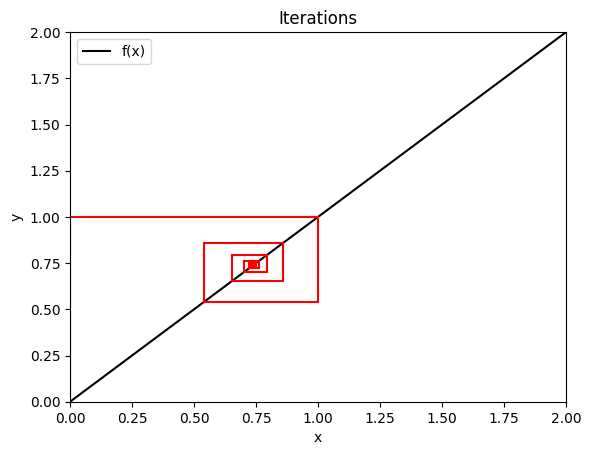

In [1]:
"""
Iterační metoda je numerická metoda používaná k řešení různých matematických problémů, jako jsou hledání kořenů (řešení rovnic), hledání pevných bodů funkcí nebo optimalizační úlohy. 
Základní myšlenkou je opakovaně aplikovat určitou funkci na počáteční hodnotu a postupně konvergovat k řešení problému. Iterační metody jsou obvykle používány tam, kde není možné nalézt analytické řešení.

Základní postup iterační metody je následující:

-> Zvolte počáteční hodnotu: Začněte s počáteční hodnotou, která je blízko k očekávanému řešení.

-> Iterujte: Aplikujte iterační funkci na aktuální hodnotu a získáte novou hodnotu. To se opakuje, dokud se nedosáhne určeného kritéria zastavení.

-> Kritérium zastavení: To může být dosažení určité přesnosti (tj. když rozdíl mezi dvěma po sobě jdoucími hodnotami je dostatečně malý), dosažení maximálního počtu iterací nebo jiné specifické podmínky pro zastavení.

-> Výstup: Poslední dosažená hodnota by měla být aproximací řešení problému.

Příklady iteračních metod zahrnují:

-> Metoda půlení intervalu (bisekce) pro hledání kořenů funkce.
-> Metoda Newton-Raphson pro hledání kořenů funkcí.
-> Metoda pevného bodu (jako v původním kódu) pro hledání pevných bodů funkcí.

Každá iterační metoda vyžaduje pečlivou volbu počáteční hodnoty a vhodné podmínky pro zastavení, aby byla zajištěna konvergence k řešení. 
V některých případech může být iterační metoda konvergovat rychle, zatímco v jiných může vyžadovat více iterací. Je důležité vyhodnotit konkrétní problém a zvolit vhodnou iterační metodu a parametry pro dosažení přesných výsledků.
"""


import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2 * x**1.5 * x / 5

def g1(x):
    return ((2 * x + 5) / 2)**(1/3)

def g2(x):
    return x**3 - 2.5

def g(x):
    return np.cos(x)

x = np.linspace(0, 2, 100)
plt.plot(x, x, label='f(x)', color='black')

x0 = 0
for i in range(15):
    print(x0)
    x1 = g(x0)
    plt.plot([x0, x0], [x0, x1], color='red')
    plt.plot([x0, x1], [x1, x1], color='red')
    x0 = x1

plt.xlim(0, 2)
plt.ylim(0, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Iterations')
plt.legend()
plt.show()

# 6.Seminář: Gausova eliminace se zpětným chodem

In [9]:
"""
Gausova eliminace s zpětným chodem (také známá jako Gauss-Jordanova eliminace) je algoritmus používaný k řešení systémů lineárních rovnic. 
Tento algoritmus transformuje rozšířenou matici systému do redukovaného schodovitého tvaru pomocí elementárních řádkových operací, které jsou:

-> Výměna dvou řádků.
--> Násobení řádku nenulovým číslem.
--> Přičtení násobku jednoho řádku k jinému řádku.
"""



import numpy as np

def gauss_jordan_elimination(A, b):
    # Připojíme b k A, aby se na něj vztahovaly stejné řádkové operace
    Ab = np.hstack([A, np.array(b).reshape(-1, 1)])
    
    n = len(b)
    # Převedení na horní trojúhelníkovou formu
    for i in range(n):
        # Normalizace řádků
        a = Ab[i, :]
        Ab[i, :] = a / a[i]
        # Eliminace všech ostatních prvků ve sloupci
        for j in [x for x in range(n) if x != i]:
            Ab[j, :] = Ab[j, :] - Ab[j, i] * Ab[i, :]

    # Zpětný chod - získání řešení
    for i in range(n-1, -1, -1):
        for j in [x for x in range(n) if x != i]:
            Ab[j, :] = Ab[j, :] - Ab[j, i] * Ab[i, :]

    # Výsledek je v posledním sloupci po transformaci
    return Ab[:, -1]

# Příklad použití
A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]], dtype=np.float64)

b = np.array([8, -11, -3])

result = gauss_jordan_elimination(A, b)
print(result)






[ 2.  3. -1.]


# 7.Seminář: Hermiteho interpolace, Hornerova Metoda

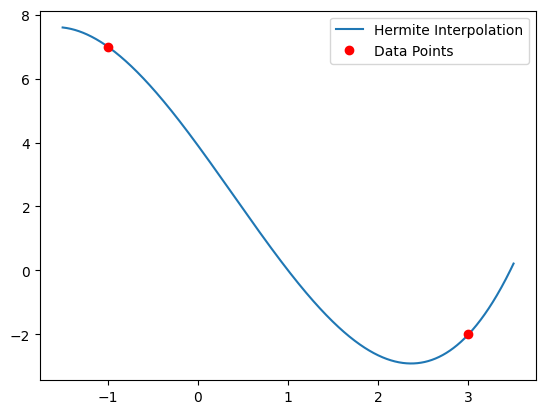

-1.9999999967268423
2.9999999906493713


In [10]:
"""
Hermiteho interpolace je metoda konstrukce interpolujícího polynomu s předepsanými hodnotami a derivacemi v daných bodech. 
V poskytnutém kódu funkce hermite vypočítává koeficienty kubického Hermiteova polynomu. Zde je rozbor funkce:

Vstupy:
-> x0, x1: x-souřadnice dvou datových bodů.
-> y0, y1: y-souřadnice dvou datových bodů.
-> d0, d1: Derivace v bodech odpovídajících datovým bodům.

Výpočet:
-> h: Rozdíl mezi x-souřadnicemi datových bodů.
-> hrec: Inverzní hodnota h.
-> delta: Rozdíl mezi normalizovanými hodnotami y a první derivace v prvním bodě.
-> Delta: Rozdíl mezi druhou derivací v druhém bodě a první derivací v prvním bodě.
-> a3: Koeficient kubického členu Hermiteova polynomu.

Návratová hodnota:
-> Pole obsahující koeficienty Hermiteova polynomu.

Hornerova Metoda pro Evalvaci Polynomu:
-> Hornerova metoda je způsob vyhodnocení polynomu pomocí opakovaného faktorizování. V kódu je funkce horner implementována takto:

Vstupy:
-> x: Bod, ve kterém má být polynom vyhodnocen.
-> x0: Počáteční bod polynomu.
-> coef: Koeficienty Hermiteova polynomu.

Výpočet:
-> Využívá Hornerovu metodu k postupnému vyhodnocování polynomu v bodě x.

Návratová hodnota:
-> Hodnota vyhodnoceného polynomu v bodě x.
"""



import numpy as np
import matplotlib.pyplot as plt

def hermite(x0, x1, y0, y1, d0, d1):
    h = x1 - x0
    hrec = 1 / h
    delta = (y1 - y0) * hrec - d0
    Delta = d1 - d0
    a3 = (Delta - 2 * delta)
    return np.array([y0, d0, (delta - a3) * hrec, a3 * hrec * hrec])

def horner(x, x0, coef):
    n = len(coef)
    y = coef[n - 1]
    t = x - x0
    for i in range(n - 2, -1, -1):
        y = y * t + coef[i]
    return y

def fd(f, x, h=0.0000001):
    return (f(x + h) - f(x - h)) / (2 * h)

x0 = -1
x1 = 3
y0 = 7
y1 = -2
d0 = -2
d1 = 3

coef = hermite(x0, x1, y0, y1, d0, d1)

x_values = np.linspace(x0 - 0.5, x1 + 0.5, 1000)
y_values = [horner(x, x0, coef) for x in x_values]

plt.plot(x_values, y_values, label='Hermite Interpolation')
plt.plot([x0, x1], [y0, y1], 'ro', label='Data Points')
plt.legend()
plt.show()

print(fd(lambda x: horner(x, x0, coef), x0))  # d0
print(fd(lambda x: horner(x, x0, coef), x1))  # d1

# 8.Seminář: SIR model (Susceptible-Infectious-Recovered), Lotka-Volterra

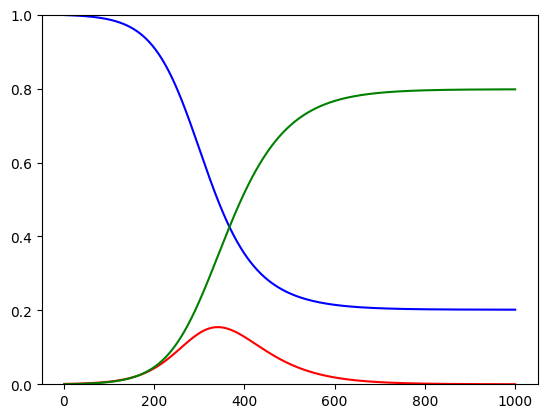

In [1]:
"""
Tento kód simuluje dynamiku jednoduchého epidemiologického modelu nazývaného SIR model (Susceptible-Infectious-Recovered), který rozděluje populaci na náchylné (S), infikované (I) a uzdravené (R) jedince. Zde je rozbor kódu:

Funkce ODEstep:
-> Tato funkce provádí jediný krok numerické integrace pro obyčejnou diferenciální rovnici (ODE) pomocí Eulerovy metody.

Vstupy:
-> f: ODE funkce definující dynamiku systému.
-> y: Aktuální stavový vektor.
-> t: Aktuální čas.
-> dt: Velikost časového kroku pro integraci.

Výstup:
-> Aktualizovaný stavový vektor po provedení kroku o velikosti dt v ODE.

Funkce SIR:
-> Tato funkce definuje konkrétní ODE pro SIR model.

Vstupy:
-> y: Stavový vektor [S, I, R] reprezentující podíly populace, která je náchylná, infikovaná a uzdravená.
-> t: Časový parametr (v této konkrétní implementaci se nepoužívá).
-> beta: Parametr přenosové rychlosti nákazy.
-> nu: Parametr rychlosti uzdravování.

Výstup:
-> Derivace stavových proměnných [dS/dt, dI/dt, dR/dt].
-> Simulace pomocí Eulerovy metody:

Kód inicializuje pole Y pro ukládání stavových vektorů v různých časových krocích.
Počáteční stav je nastaven s většinou náchylných jedinců (S = 0.999, I = 0.001, R = 0).
Kód iteruje přes časové kroky, používá funkci ODEstep k aktualizaci stavu o velikost časového kroku dt v ODE.
"""

import numpy as np
import matplotlib.pyplot as plt

def ODEstep(f, y, t, dt):
    return y + dt * f(y, t)

def SIR(y, t, beta=0.4, nu=0.2):
    dS = -beta * y[0] * y[1]
    dR = nu * y[1]
    dI = -dS - dR
    return np.array([dS, dI, dR], dtype=float)

n = 1000
Y = np.zeros((n, 3))
Y[0, :] = [0.999, 0.001, 0]

for i in range(1, n):
    Y[i, :] = ODEstep(SIR, Y[i-1, :], i, 0.1)

plt.plot(range(1, n+1), Y[:, 0], color='blue')
plt.plot(range(1, n+1), Y[:, 1], color='red')
plt.plot(range(1, n+1), Y[:, 2], color='green')  
plt.ylim(0, 1)
plt.show()

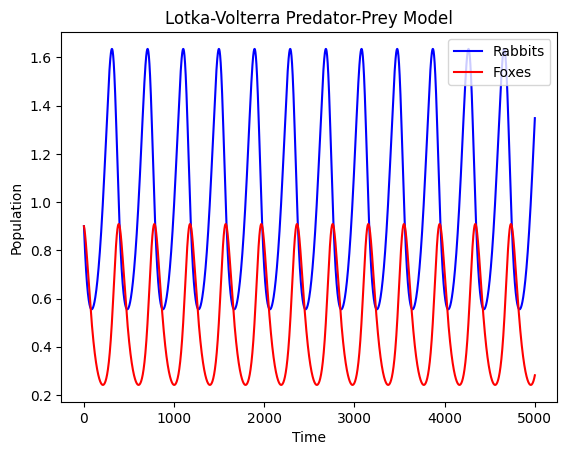

In [2]:
"""
Tento kód simuluje Lotka-Volterra model, který je matematickým modelem popisujícím vztahy mezi dvěma druhy v ekosystému, kde jeden druh je predátorem (liška) a druhý je kořistí (králíci). Zde je vysvětlení kódu:

Funkce ODEstepMiddle:
-> Tato funkce provádí jediný krok numerické integrace pro obyčejnou diferenciální rovnici (ODE) pomocí metody středního bodu (midpoint method).

Vstupy:
-> f: ODE funkce definující dynamiku systému.
-> y: Aktuální stavový vektor.
-> t: Aktuální čas.
-> dt: Velikost časového kroku pro integraci.

Výstup:
-> Aktualizovaný stavový vektor po provedení kroku o velikosti dt v ODE pomocí metody středního bodu.

Funkce ODEstepA:
-> Tato funkce provádí jediný krok numerické integrace pro ODE pomocí metody průměru (trapezoidal rule).

Vstupy:
-> f: ODE funkce definující dynamiku systému.
-> y: Aktuální stavový vektor.
-> t: Aktuální čas.
-> dt: Velikost časového kroku pro integraci.

Výstup:
-> Aktualizovaný stavový vektor po provedení kroku o velikosti dt v ODE pomocí metody průměru.

Funkce LV:
-> Tato funkce definuje konkrétní ODE pro Lotka-Volterra model.

Vstupy:
-> y: Stavový vektor [králíci, lišky].
-> t: Časový parametr (v této konkrétní implementaci se nepoužívá).
-> r, a, s, b: Parametry ovlivňující dynamiku modelu.

Výstup:
-> Derivace stavových proměnných [d(králíci)/dt, d(lišky)/dt].
-> Simulace pomocí metody průměru:

Kód inicializuje pole Y pro ukládání stavových vektorů v různých časových krocích.
Počáteční stav je nastaven s populací králíků a lišek [0.9, 0.9].
Kód iteruje přes časové kroky, používá funkci ODEstepA k aktualizaci stavu o velikost časového kroku dt v ODE pomocí metody průměru.
Nakonec jsou vykresleny průběhy populací králíků a lišek v závislosti na čase.
"""

def ODEstepMiddle(f, y, t, dt):
    dtpul = 0.5 * dt
    y_mid = ODEstep(f, y, t, dtpul)
    return y + dt * f(y_mid, t + dtpul)

def ODEstepA(f, y, t, dt):
    y_mid = ODEstep(f, y, t, dt)
    return y + dt * (f(y,t) + f(y_mid, t + dt))/2

def LV(y, t, r=0.67, a=1.33, s=1, b=1):
    return np.array([y[0]*(r-a*y[1]), y[1]*(-s+b*y[0])], dtype=float)

n = 5000
Y = np.zeros((n, 2))
Y[0, :] = [0.9, 0.9]

for i in range(1, n):
    Y[i, :] = ODEstepA(LV, Y[i-1, :], i, 0.02)

plt.plot(range(1, n+1), Y[:, 0], color='blue', label='Rabbits')
plt.plot(range(1, n+1), Y[:, 1], color='red', label='Foxes')
plt.legend()
plt.title("Lotka-Volterra Predator-Prey Model")
plt.xlabel("Time")
plt.ylabel("Population") 
plt.show()


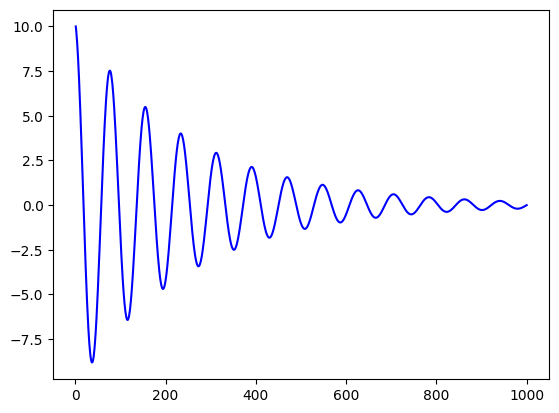

In [3]:
"""
Tento kód simuluje pohyb kyvadla s tlumením. Zde je vysvětlení kódu:

Funkce TK:
-> Tato funkce definuje diferenciální rovnici pro tlumené kyvadlo.

Vstupy:
-> y: Stavový vektor [úhel, úhlová rychlost].
-> t: Časový parametr (v této konkrétní implementaci se nepoužívá).
-> o: Frekvence kyvadla.
-> z: Koeficient tlumení.

Výstup:
-> Derivace stavových proměnných [úhlová rychlost, zrychlení].

Simulace pohybu kyvadla s tlumením:
-> Kód inicializuje pole Y pro ukládání stavových vektorů v různých časových krocích.
-> Počáteční stav je nastaven na [10, -10], což znamená, že kyvadlo začíná s úhlem 10 radianů a úhlovou rychlostí -10 rad/s.
-> Kód iteruje přes časové kroky, používá funkci ODEstepA k aktualizaci stavu o velikost časového kroku dt v ODE pomocí metody průměru.
-> Nakonec je vykreslen průběh úhlu kyvadla v závislosti na čase.

Takto je kód navržen k simulaci tlumeného kyvadla a zobrazuje, jak se úhel kyvadla mění v čase s tlumením.
"""

def TK(y,t,o=4,z=0.05): # z je tlumení, o je frekvence
    return np.array([y[1], -(2*z*o*y[1]+o*o*y[0])], dtype=float)

n = 1000
Y = np.zeros((n, 2))
Y[0, :] = [10, -10] # druhá proměnná tlačí nahoru nebo dolů; první kde začíná

for i in range(1, n):
    Y[i, :] = ODEstepA(TK, Y[i-1, :], i, 0.02)

plt.plot(range(1, n+1), Y[:, 0], color='blue')
plt.show()

# 9.Seminář: Runge-Kutta čtvrtého řádu

In [7]:
"""

Funkce ODEstepRK4 implementuje krok Runge-Kutta čtvrtého řádu, což je numerická metoda pro řešení obyčejných diferenciálních rovnic (ODEs).
Tato metoda je často používána pro aproximaci řešení ODEs, zejména v případech, kdy není možné najít exaktní řešení.
-> k1: První krok je vypočítán pomocí funkce f(t, y), kde t je nezávislá proměnná a y je aktuální hodnota závislé proměnné.
-> k2: Druhý krok se vypočítá přidáním k t poloviny časového kroku dtpul a k y předchozího kroku vynásobeného prvním krokem k1 a polovinou časového kroku.
-> k3: Třetí krok se vypočítá stejným způsobem jako k2, ale s novými hodnotami t a y.
-> k4: Čtvrtý krok se vypočítá s přidáním celého časového kroku k t a k y předchozího kroku vynásobeného třetím krokem k3.
-> Nakonec se spočítá nová hodnota y pomocí váženého průměru čtyř kroků.

Celkově vzato, Runge-Kutta čtvrtého řádu je schopen poskytnout relativně přesné aproximace hodnoty závislé proměnné v případě, kdy známe derivaci této proměnné vzhledem k nezávislé proměnné.

Kód:
-> ODEstepRK4: Funkce pro krok Runge-Kutta čtvrtého řádu při řešení diferenciálních rovnic.
-> func: Funkce, kterou integrujeme, ve vašem případě eˇ-xˇ2 * 2/sqrt(pi)
-> trapezoidal: Numerická metoda trapezů pro výpočet integrálu funkce.
-> Vytvoření seznamu a_values, kde každý prvek představuje výpočet integrálu s různým počtem dílků (2, 4, 8, ..., 2^m).
-> Cyklus for, který postupně kombinuje hodnoty podle Richardsonovy extrapolace.
                        
"""
def ODEstepRK4(f, t, y, dt):
    dtpul = 0.5 * dt
    tp = t + dtpul
    k1 = f(t, y)
    k2 = f(t + dtpul, y + k1 * dtpul)
    k3 = f(tp, y + k2 * dtpul)
    k4 = f(t + dt, y + dt * k3)
    return y + dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6

def func(x):
    return np.exp(-x*x) * 2 / np.sqrt(np.pi)

def trapezoidal(f, a, b, n=1):
    h = (b - a) / n
    nodes = np.linspace(a, b, n+1)
    suma = 0.5 * (f(a) + f(b)) + np.sum(f(nodes[1:-1]))
    return h * suma

m = 4
a_values = [trapezoidal(func, 0, 1, 2**k) for k in range(m + 1)]

for j in range(1, m + 1):
    a_values = (4**j * np.array(a_values[1:(m + 2 - j)]) - np.array(a_values[0:(m + 1 - j)])) / (4**j - 1)

print(a_values[0])

0.8427007932686705


# 10.Seminář: Metoda nejmenších čtverců (Least Squares Method)

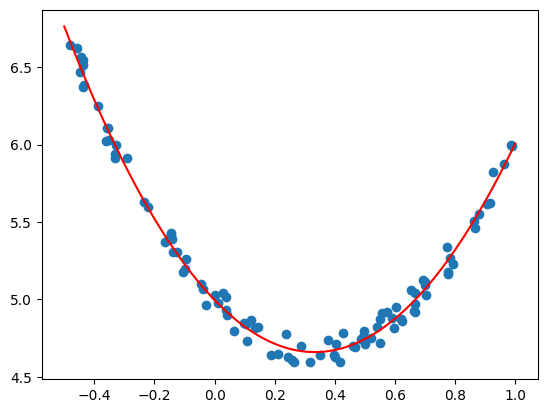

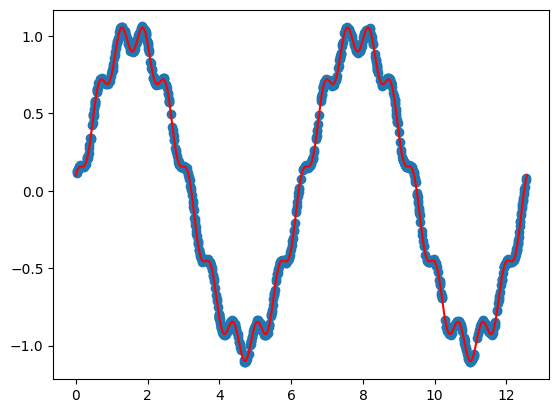

In [1]:
"""
Metoda nejmenších čtverců (Least Squares Method) je matematická metoda používaná k nalezení nejlepšího odhadu parametrů v lineárním nebo nelineárním modelu pro data, která obsahují náhodný šum.
Tato metoda minimalizuje sumu čtverců reziduí (rozdílů mezi naměřenými a odhadovanými hodnotami) a poskytuje odhad parametrů, který je nejlepší vzhledem k daným datům.
-> Formulace problému: Zapište model f(x,c) a rezidua epsilon
-> Vytvoření matic: Sestavte matici M, která obsahuje hodnoty funkcí f(x,c) pro každý datový bod a vektor y s naměřenými hodnotami.
-> Výpočet normální rovnice: Vypočtěte matici A=M*Mˇt a vektor b=M*y
-> Řešení normální rovnice: Řešte systém normálních rovnic Ac=b pro odhady parametrů c
-> Odhady parametrů: Odhady parametrů jsou řešení c získaná v předchozím kroku.
-> Vyúčtování modelu: Vypočtěte odhadovaná data pomocí modelu f(x,c)

Tento kód demonstruje použití metody nejmenších čtverců (Least Squares Method) pro aproximaci dat dvěma různými funkcemi.
->Polynomiální aproximace:
---> fitF(x) je funkce, která vytváří vektor příznaků pro polynomiální aproximaci. V tomto případě je to vektor 
---> LSA(x, y, fitF) provádí lineární regresi pomocí metody nejmenších čtverců. Vytváří matici 
--->Horner(coef, x) je funkce pro vyhodnocení polynomu s koeficienty získanými z lineární regrese. Používá Hornerovu metodu pro efektivní vyhodnocení polynomu.

->Nelineární aproximace:
-> fitFsc(x) je funkce pro vytvoření vektoru příznaků pro nelineární aproximaci.
-> Opět se používá LSA(x, y, fitFsc), ale tentokrát pro aproximaci nelineární funkce.
-> A nakonec sum(coef * fitFsc(ti)) se používá k vyhodnocení nelineární funkce s koeficienty získanými metodou nejmenších čtverců.

Obě aproximace jsou pak graficky zobrazeny spolu s původními daty. Příklad s polynomiální aproximací generuje náhodná data, zatímco příklad s nelineární aproximací vytváří data podle funkce 
"""

import numpy as np
import matplotlib.pyplot as plt

def fitF(x):
    return np.array([1, x, x**2])

def fitFsc(x):
    return np.array([np.sin(x), np.cos(10*x)])

def LSA(x, y, fitF):
    N = len(x)
    r = len(fitF(0))
    M = np.zeros((r, N))
    for i in range(N):
        M[:, i] = fitF(x[i])
    A = M @ M.T
    b = M @ y
    return np.linalg.solve(A, b)

def Horner(coef, x):
    res = coef[-1]
    for i in range(len(coef) - 2, -1, -1):
        res = res * x + coef[i]
    return res

N = 100
x = np.random.uniform(-0.5, 1, N)
y = (3*x - 2)*x + 5 + np.random.uniform(-0.1, 0.1, N)
plt.scatter(x, y)
t = np.linspace(-0.5, 1, 100)
plt.plot(t, [Horner(LSA(x, y, fitF), ti) for ti in t], color='red')

N = 1000
x = np.random.uniform(0, 4*np.pi, N)
y = np.sin(x) + 0.1*np.cos(10*x) + np.random.uniform(-0.01, 0.01, N)
plt.figure()
plt.scatter(x, y)
coef = LSA(x, y, fitFsc)
t = np.linspace(0, 4*np.pi, 1000)
plt.plot(t, [sum(coef * fitFsc(ti)) for ti in t], color='red')
plt.show()